## Final Project Submission

Please fill out:
* Student name: George Nyandusi
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### PROJECT OVERVIEW

This analysis aims to create a structured approach to help this company understand and mitigate risks that will arise when it decides to venture into the aviation industry by purchasing and operating aircraft. The goal of this analysis is to help the decision makers make calculated and informed decisions in their investment. These decisions can be attained from the analysis below:

### OBJECTIVES

1. Identify Aircraft with the lowest accident rate - helps to identify aircrafts with highest and lowest accident rate 
2. Examine number of accidents by engine type - to determine which type of engine experiences accidents alot
3. Analyze the trends of accidents over time - this helps to show the time stamp when accidents occured the most
4. Evaluate accidents by geographic location - this helps to show which locations experience the most accidents

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('Aviation_Data.csv', low_memory=False)

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Show quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Summary:
    
- The dataset has 90348 rows and 31 columns 
- The columns and some rows have missing data.


## Cleaning and normalizing the data

In [5]:
# Investigate dataset for duplicate and missing values
df_duplicates = df.duplicated().value_counts()
print(df_duplicates)

#check for length of duplicate values
duplicates = df[df.duplicated()]
print(len(duplicates))

False    88958
True      1390
dtype: int64
1390


In [6]:
# Remove duplicates
df = df.drop_duplicates()
df.shape

(88958, 31)

In [7]:
# Drop extraneous columns
df = df.drop(columns=['Investigation.Type', 'Accident.Number', 'Registration.Number', 'Report.Status'])


In [8]:
df.shape

(88958, 27)

In [9]:
# Check for missing values
df.isna().sum()

Event.Id                     69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Publication.Date          15299
dtype: int64

In [10]:
# Drop some columns with missing values
df = df.drop(columns=['Aircraft.Category', 'FAR.Description', 'Air.carrier', 'Schedule', 'Broad.phase.of.flight', 'Publication.Date'])
print (df)

             Event.Id  Event.Date         Location        Country   Latitude  \
0      20001218X45444  1948-10-24  MOOSE CREEK, ID  United States        NaN   
1      20001218X45447  1962-07-19   BRIDGEPORT, CA  United States        NaN   
2      20061025X01555  1974-08-30    Saltville, VA  United States  36.922223   
3      20001218X45448  1977-06-19       EUREKA, CA  United States        NaN   
4      20041105X01764  1979-08-02       Canton, OH  United States        NaN   
...               ...         ...              ...            ...        ...   
90343  20221227106491  2022-12-26    Annapolis, MD  United States        NaN   
90344  20221227106494  2022-12-26      Hampton, NH  United States        NaN   
90345  20221227106497  2022-12-26       Payson, AZ  United States    341525N   
90346  20221227106498  2022-12-26       Morgan, UT  United States        NaN   
90347  20221230106513  2022-12-29       Athens, GA  United States        NaN   

        Longitude Airport.Code Airport.

In [11]:
print(df.columns)

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')


In [12]:
# Handle missing data
df_clean = df.copy()
df_clean['Event.Id'].fillna('nan', inplace=True)
df_clean['Event.Date'].fillna('Unknown', inplace=True)
df_clean['Location'].fillna('Unknown', inplace=True)
df_clean['Country'].fillna('Unknown', inplace=True)
df_clean['Latitude'].fillna('Unknown', inplace=True)
df_clean['Longitude'].fillna('Unknown', inplace=True)
df_clean['Airport.Code'].fillna('Unknown', inplace=True)
df_clean['Airport.Name'].fillna('Unknown', inplace=True)
df_clean['Injury.Severity'].fillna('Unknown', inplace=True)
df_clean['Aircraft.damage'].fillna('Unknown', inplace=True)
df_clean['Make'].fillna('Unknown', inplace=True)
df_clean['Model'].fillna('unknown', inplace=True)
df_clean['Amateur.Built'].fillna('Unknown', inplace=True)
df_clean['Number.of.Engines'].fillna('Unknown', inplace=True)
df_clean['Engine.Type'].fillna('Unknown', inplace=True)
df_clean['Purpose.of.flight'].fillna('Unknown', inplace=True)
df_clean['Total.Fatal.Injuries'].fillna('Unknown', inplace=True)
df_clean['Total.Serious.Injuries'].fillna('Unknown', inplace=True)
df_clean['Total.Minor.Injuries'].fillna('Unknown', inplace=True)
df_clean['Total.Uninjured'].fillna('Unknown', inplace=True)
df_clean['Weather.Condition'].fillna('Unknown', inplace=True)


#check for missing values
df_clean.isna().sum()

Event.Id                  0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

In [13]:
# Check the info of the cleaned dataframe
print(df_clean.info())

df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88958 non-null  object
 1   Event.Date              88958 non-null  object
 2   Location                88958 non-null  object
 3   Country                 88958 non-null  object
 4   Latitude                88958 non-null  object
 5   Longitude               88958 non-null  object
 6   Airport.Code            88958 non-null  object
 7   Airport.Name            88958 non-null  object
 8   Injury.Severity         88958 non-null  object
 9   Aircraft.damage         88958 non-null  object
 10  Make                    88958 non-null  object
 11  Model                   88958 non-null  object
 12  Amateur.Built           88958 non-null  object
 13  Number.of.Engines       88958 non-null  object
 14  Engine.Type             88958 non-null  object
 15  Pu

,Event.Id,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,...,108-3,No,1,Reciprocating,Personal,2,0,0,0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),Destroyed,...,PA24-180,No,1,Reciprocating,Personal,4,0,0,0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,Fatal(3),Destroyed,...,172M,No,1,Reciprocating,Personal,3,Unknown,Unknown,Unknown,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,...,112,No,1,Reciprocating,Personal,2,0,0,0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,Fatal(1),Destroyed,...,501,No,Unknown,Unknown,Personal,1,2,Unknown,0,VMC


In [14]:
# save the data frame to a csv file
df_clean.to_csv('Aviation_Data_clean.csv')

In [15]:
import pandas as pd
df = pd.read_csv('Aviation_Data_clean.csv')
df.head(30)

,Unnamed: 0,Event.Id,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),...,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),...,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,2,20061025X01555,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,Fatal(3),...,172M,No,1.0,Reciprocating,Personal,3.0,Unknown,Unknown,Unknown,IMC
3,3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),...,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,4,20041105X01764,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,Fatal(1),...,501,No,Unknown,Unknown,Personal,1.0,2.0,Unknown,0.0,VMC
5,5,20170710X52551,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Unknown,Unknown,Non-Fatal,...,DC9,No,2.0,Turbo Fan,Unknown,Unknown,Unknown,1.0,44.0,VMC
6,6,20001218X45446,1981-08-01,"COTTON, MN",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),...,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC
7,7,20020909X01562,1982-01-01,"PULLMAN, WA",United States,Unknown,Unknown,Unknown,BLACKBURN AG STRIP,Non-Fatal,...,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
8,8,20020909X01561,1982-01-01,"EAST HANOVER, NJ",United States,Unknown,Unknown,N58,HANOVER,Non-Fatal,...,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
9,9,20020909X01560,1982-01-01,"JACKSONVILLE, FL",United States,Unknown,Unknown,JAX,JACKSONVILLE INTL,Non-Fatal,...,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC


Summary:
 - replaced null values  with False
 - dropped columns with extraneous values 
 - dropped some columns with missing values

## Objective 1 - Identify Aircraft with the lowest accident rate

In [16]:
# Count accidents per aircraft model
accidents_per_model = df['Model'].value_counts().reset_index()
accidents_per_model.columns = ['Model', 'AccidentCount']
print(accidents_per_model.head(10))

       Model  AccidentCount
0        152           2367
1        172           1756
2       172N           1164
3  PA-28-140            932
4        150            829
5       172M            798
6       172P            689
7        182            659
8        180            622
9       150M            585


In [17]:
# Top 10 safest (least accidents)
safest_models = accidents_per_model.sort_values('AccidentCount').head(10)
print(safest_models)

                   Model  AccidentCount
6158           Fokker F1              1
8206  Starduster SA100DL              1
8207               MOOSE              1
8208     COMP AIR 8 SS52              1
8209              J3-65C              1
8210        GLASAIR I-FT              1
8211  AS-350 B2 Ecureuil              1
8212            727-200B              1
8213        PA 18 225 DD              1
8214          GYPSY HAWK              1


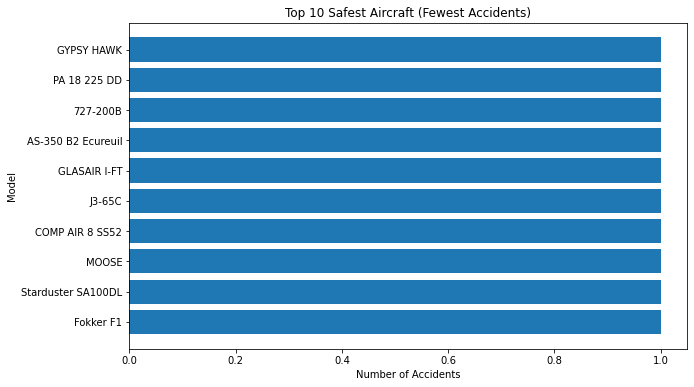

In [18]:
# Extract data for plotting
model = safest_models['Model']
accident_counts = safest_models['AccidentCount']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(model, accident_counts)  
plt.title('Top 10 Safest Aircraft (Fewest Accidents)')
plt.xlabel('Number of Accidents')
plt.ylabel('Model')
plt.show()

All these planes have the same safety record as they have been involved in one accident each.

## Objective 2 - Examine number of accidents by engine type

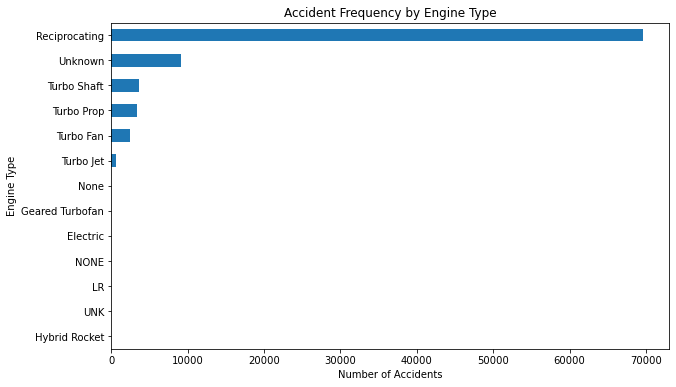

In [19]:
engine_accidents = df.groupby('Engine.Type')['Engine.Type'].count().sort_values()

# Plot
engine_accidents.plot(kind='barh', figsize=(10, 6))
plt.title('Accident Frequency by Engine Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Engine Type')
plt.show()


from the graph above we can see that the safest engine type include the Geared Turbofan, the electric, the lr and the hybrid rocket

## Objective 3 - Analyze the trend of the accidents over time

In [25]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

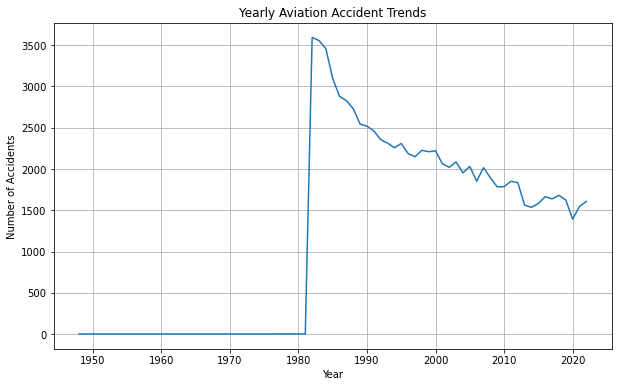

In [28]:
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year
yearly_accidents = df.groupby('Year')['Year'].count()

# Plot
yearly_accidents.plot(kind='line', figsize=(10, 6))
plt.title('Yearly Aviation Accident Trends')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()


In [ ]:

from the data above we can see that the 

## Objective 4 - Evaluate accidents by geographic distribution

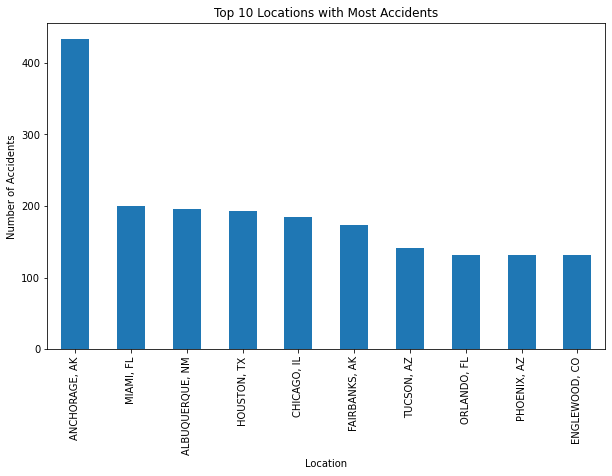

In [20]:
region_accidents = df.groupby('Location')['Location'].count().sort_values(ascending=False).head(10)

# Plot
region_accidents.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Locations with Most Accidents')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.show()


from the data above, the location with the most accidents is Anchorage,AK followed by the top ten areas with the mmost accidents